In [10]:
#--------------------------------------------------
#  LOAD PACKAGES
#--------------------------------------------------
require(readxl)
require(ggplot2)
#require(viridis)
#require(RColorBrewer)
#library(ggthemes)
#library(scales)
require(plotly)
require(plantecophys)
require(lme4)
#require(plyr)
#require(multiplot)
require(nlme)
#library(tidyr)

Loading required package: plotly
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'plotly'"

In [58]:
#--------------------------------------------------
#  LOAD FUNCTIONS
#--------------------------------------------------

setwd('C:/Users/fb428/OneDrive - University of Exeter/Documents/Tropoz/')
source('scripts/ACi_functions.R')
f = 'XC1'

#--------------------------------------------------
#  LOAD DATA
#--------------------------------------------------

DATA <- read.csv(gsub(" ", "", paste(f,'/',f,'_ACi.csv')))

#--------------------------------------------------
#  CALCULATE ACI CURVES
#--------------------------------------------------
cat('Check variable names ("Pot" should be present): \n')
print(colnames(DATA))

df <- unify_excel_file(DATA)
cat('\n\n  Check all variables are present: \n')
print(colnames(df))

# give dataframe and group by variable
cat('\n fitting ACi curves: \n ')
ACI_fits <- fitACIs(df, 'Pot')

average_params <- summary_table(ACI_fits)

cat('\n check fit: \n ')
fit_summary(ACI_fits)

Check variable names ("Pot" should be present): 
 [1] "Obs"      "HHMMSS"   "Exp"      "Pot"      "Leaf"     "Repeat"  
 [7] "Chamber"  "FTime"    "EBal."    "Type"     "Photo"    "Cond"    
[13] "Ci"       "Trmmol"   "VpdL"     "CTleaf"   "Area"     "BLC_1"   
[19] "StmRat"   "BLCond"   "Tair"     "Tleaf"    "TBlk"     "CO2R"    
[25] "CO2S"     "H2OR"     "H2OS"     "RH_R"     "RH_S"     "Flow"    
[31] "PARi"     "PARo"     "Press"    "CsMch"    "HsMch"    "StableF" 
[37] "BLCslope" "BLCoffst" "f_parin"  "f_parout" "alphaK"   "Status"  
[43] "fda"      "Trans"    "Tair_K"   "Twall_K"  "R.W.m2."  "Tl.Ta"   
[49] "SVTleaf"  "h2o_i"    "h20diff"  "CTair"    "SVTair"   "CndTotal"
[55] "vp_kPa"   "VpdA"     "CndCO2"   "Ci_Pa"    "Ci.Ca"    "RHsfc"   
[61] "C2sfc"    "AHs.Cs"   "Hrs"      "xRH"      "xTair"    "uc_20_mV"
[67] "uc_21_mV" "sample"  


  Check all variables are present: 
 [1] "Obs"     "HHMMSS"  "Exp"     "Pot"     "Leaf"    "Chamber" "Photo"  
 [8] "Tleaf"   "Ci"      "PARi

(Intercept)        Amodel 
-0.0002941413  1.0000128739

In [65]:
average_params
write.csv(average_params, gsub(" ", "", paste(f,'/script_output_',f,'/',f,'_Photo_params.csv')), row.names=FALSE)

Vcmax.mean,Vcmax.sd,Jmax.mean,Jmax.sd
70.33426,12.35445,210.2337,15.97275


In [60]:
length(ACI_fits)

[1] 3

In [64]:
par(mfrow = c(2,2))
plot(ACI_fits)

dev.copy(png, gsub(" ", "", paste(f,'/script_output_',f,'/ACi_fits_',f,'.png')))
dev.off()

png 
  3

png 
  2

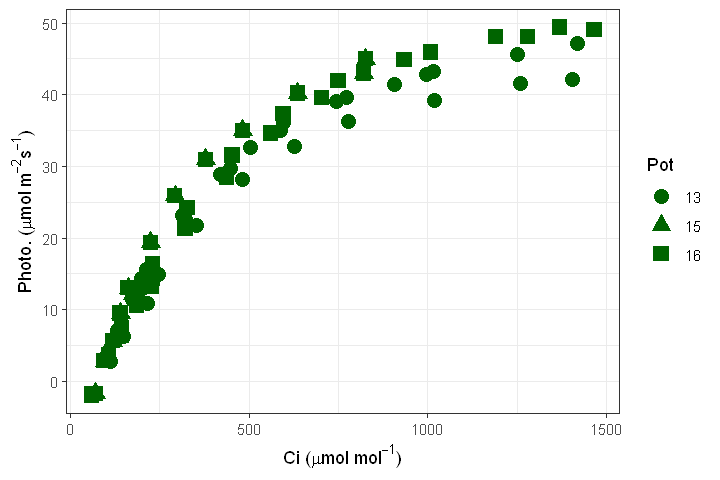

In [62]:
# rough plotting of ACI data
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot()+
  geom_point(data=df,aes(x=Ci,y=Photo,shape=Pot,colour=Chamber),size=4, color = 'darkgreen')+
  #geom_smooth(data = fits$df, aes(x = fit$df$Ci, y = fit$df$Amodel), color = 'black', se = FALSE)+
  theme_bw()+
labs(y = expression(paste("Photo. (",mu,"mol ", m^-2, s^-1,")", sep="")), x = expression(paste("Ci (",mu,"mol ", mol^-1,")", sep="")))